# Plot LAT memory errors on a geographic map

### Robert Cameron, August 2015

In [1]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize = [16, 12])
plt.rc('font', size = 20)
#rcParams['figure.figsize'] = 16, 12
#rcParams['font.size'] = 20

/Users/rac/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/rac/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/rac/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/rac/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


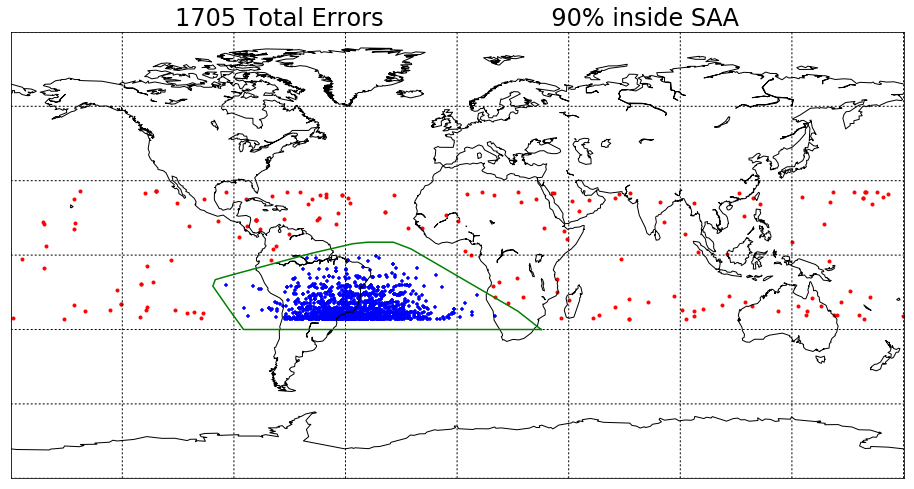

In [2]:
# read ASCII tabular file of 3-month memory errors
infile = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/memerr/idl-2015-q2.inp"
y,mon,d,h,m,s,t,lon,lat,saa = np.loadtxt(infile, unpack=True)
saa_out = np.where(saa == 0)
saa_in = np.where(saa == 1)
saapercent = 100*len(saa[saa_in])/len(saa)

saalon = [ 33.9,  24.5, -18.6, -25.7, -36.0, -42.0, -58.8, -93.1, -97.5, -98.5, -92.1, -86.1,  33.9]
saalat = [-30.0, -22.6,   2.5,   5.2,   5.2,   4.6,   0.7,  -8.6,  -9.9, -12.5, -21.7, -30.0, -30.0]

m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180)
m.drawcoastlines()
#m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,45.))
#m.drawmapboundary(fill_color='aqua')
m.plot(saalon,saalat,linewidth=1.5,color='g')
m.scatter(lon[saa_in],lat[saa_in],s=15,marker='+',color='b')
m.scatter(lon[saa_out],lat[saa_out],s=9,marker='o',color='r')
plt.title('%s Total Errors                      %d%% inside SAA' % (len(saa),saapercent))
plt.show()

In [3]:
len(saa)

1705

In [4]:
len(saa[saa_out])

163

In [5]:
len(saa[saa_in])

1542

In [6]:
saapercent

90.43988269794721